### Data Exploration

Notebook for producing plots and performing data exploration of the different features used for analysis.

In [3]:
import os
import datetime

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats

%matplotlib inline

In [4]:
data_folder = '../data/cleanedFiles/'
img_path = '../data/exploration/'


ecoli_GA
2012-01-02 10:44:00
2019-12-30 12:20:00



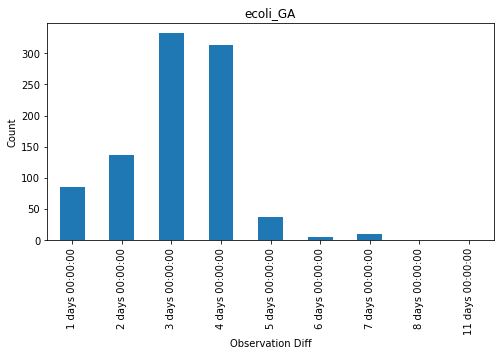

,ecoli_GA
ds,
2012-01-02,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-09,NaN
2012-01-11,NaN
...,...
2019-12-16,48396.916908
2019-12-18,48730.114496
2019-12-23,48897.179419


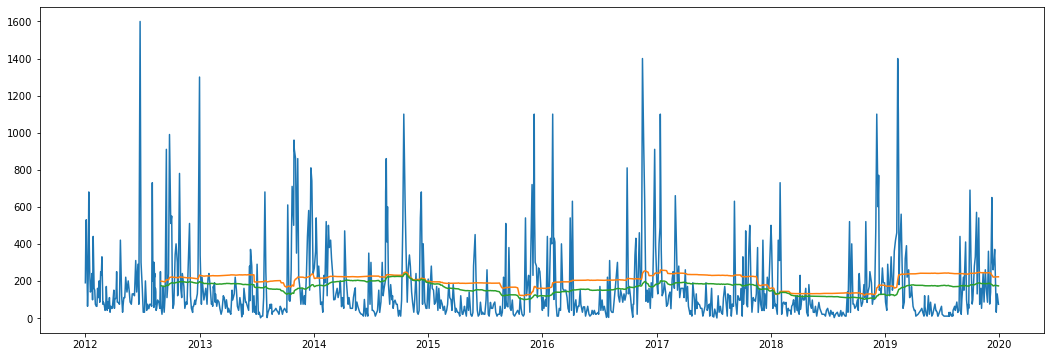

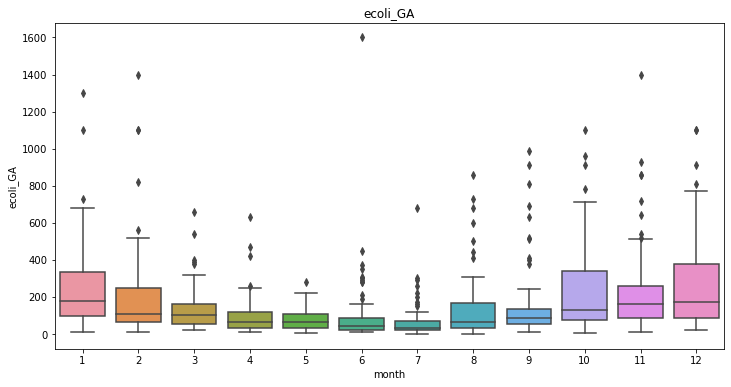

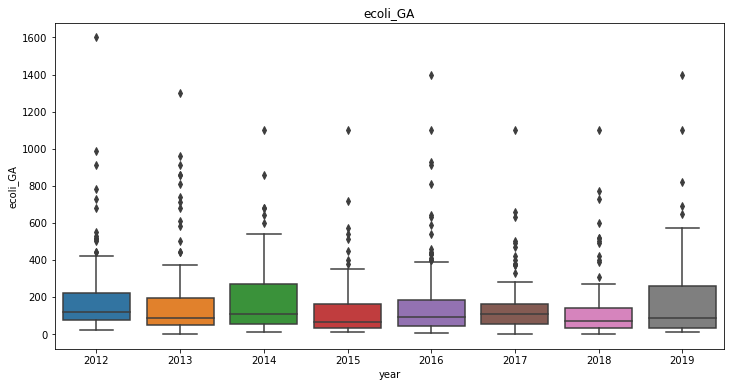




ecoli_LAE
2012-01-02 09:30:00
2019-12-30 09:23:00



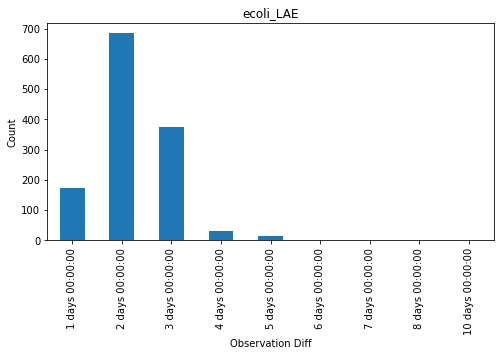

,ecoli_LAE
ds,
2012-01-02,NaN
2012-01-04,NaN
2012-01-05,NaN
2012-01-09,NaN
2012-01-11,NaN
...,...
2019-12-20,41944.085992
2019-12-23,41955.729448
2019-12-26,41957.558140


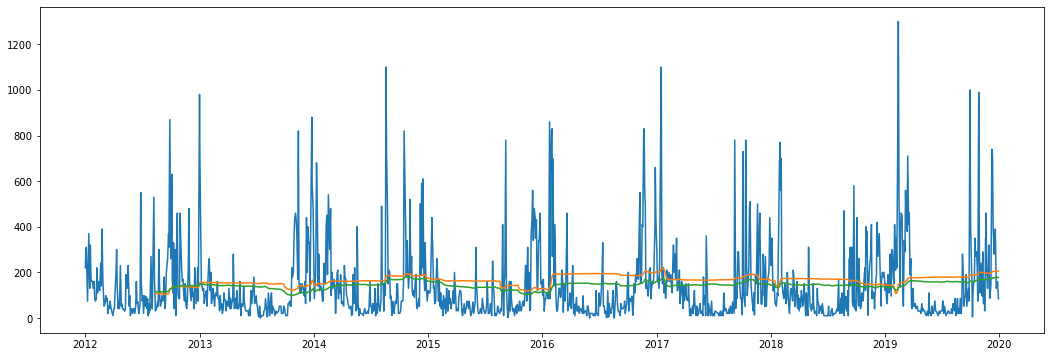

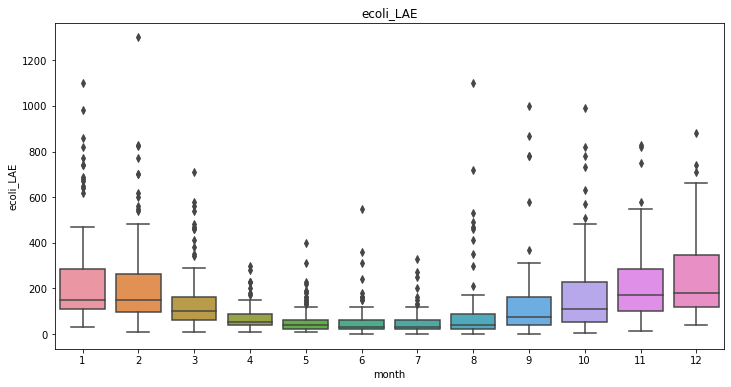

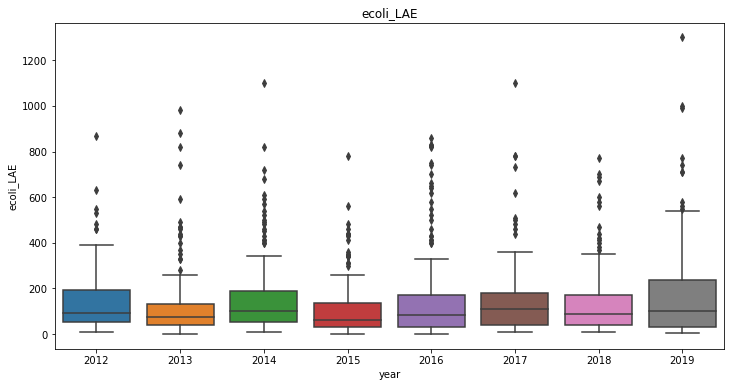

In [5]:
# E. coli Lab

labels = [
    'ecoli_GA',
    'ecoli_LAE'
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    print(df.iloc[0, 0])
    print(df.iloc[-1, 0])
    print('')
    
    df['ds'] = df['timestamp'].dt.date
    
    df = df.groupby('ds').mean().reset_index()

    plt.figure(figsize=(8,4), facecolor='w')
    pd.DataFrame(df['ds'].diff()).groupby('ds').size().plot.bar()
    plt.ylabel('Count')
    plt.xlabel('Observation Diff')
    plt.title(label)
    plt.savefig(
        img_path + label + '_ObservationDiffs.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()

    df.index = pd.DatetimeIndex(df['ds'])
    
    display(df.rolling('365D', min_periods=100).var(ddof=0))
    plt.figure(figsize=(18, 6), facecolor='w')
    plt.plot(df.index, df[label])
    plt.plot(df.index, df.rolling('365D', min_periods=100).std())
    plt.plot(df.index, df.rolling('365D', min_periods=100).mean())
    plt.savefig(
        img_path + label + '_ts.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    
    df['month'] = df.index.month
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='month', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_MonthlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    df['year'] = df.index.year
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='year', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_YearlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    print('\n\n')

colifast_GA
2012-02-16 16:09:00
2019-12-31 20:11:00



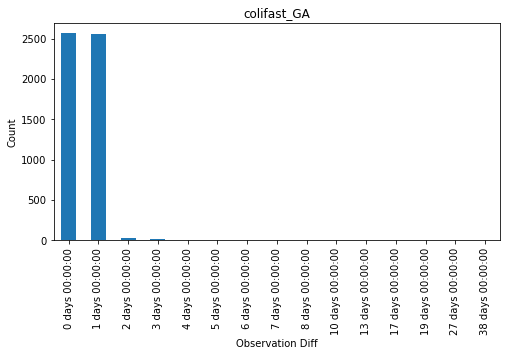

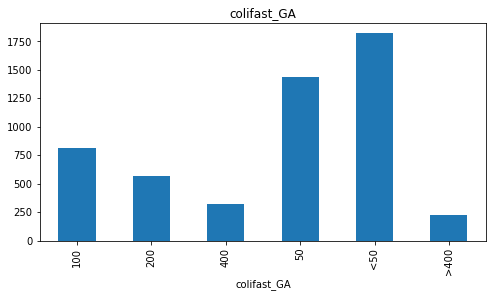




colifast_LAE
2012-01-01 09:43:00
2019-12-31 23:55:00



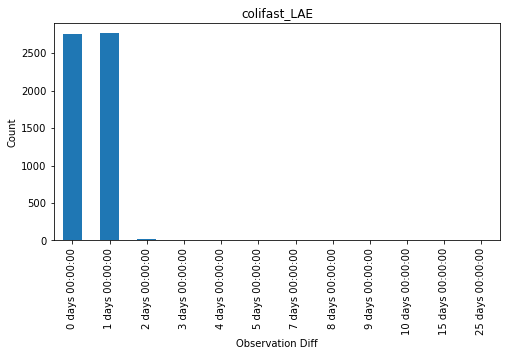

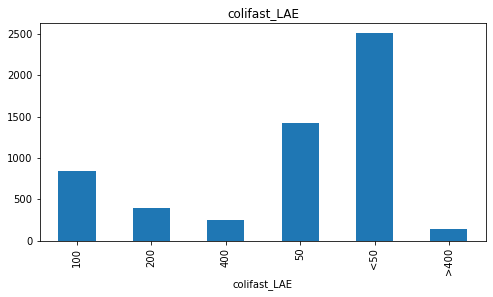

In [6]:
# E. coli Colifast

labels = [
    'colifast_GA',
    'colifast_LAE'
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    print(df.iloc[0, 0])
    print(df.iloc[-1, 0])
    print('')
    
    df['ds'] = df['timestamp'].dt.date

    plt.figure(figsize=(8,4), facecolor='w')
    pd.DataFrame(df['ds'].diff()).groupby('ds').size().plot.bar()
    plt.ylabel('Count')
    plt.xlabel('Observation Diff')
    plt.title(label)
    plt.savefig(
        img_path + label + '_ObservationDiffs.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    plt.figure(figsize=(8,4), facecolor='w')
    df.groupby(label).size().plot.bar()
    plt.title(label)
    plt.savefig(
        img_path + label + '_ClassCount.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    print('\n\n')

coliphages_LAE
2012-03-07 08:45:00
2019-12-30 09:23:00



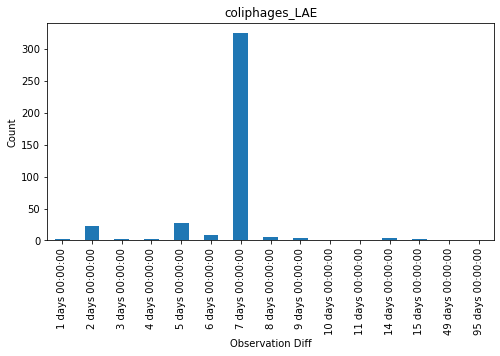

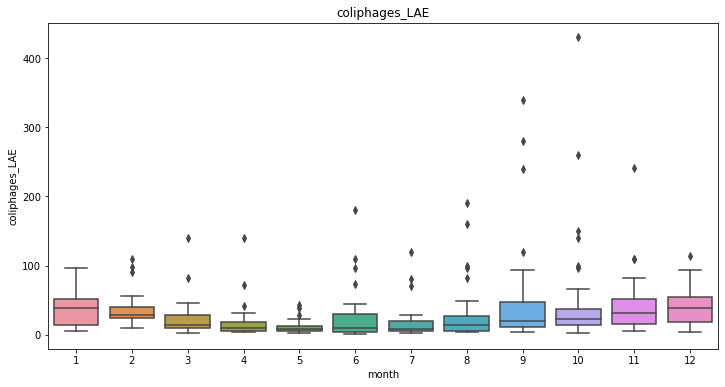




coliphages_GA
2012-03-07 11:35:00
2019-12-30 12:20:00



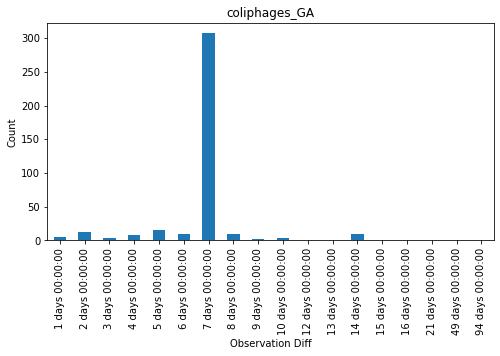

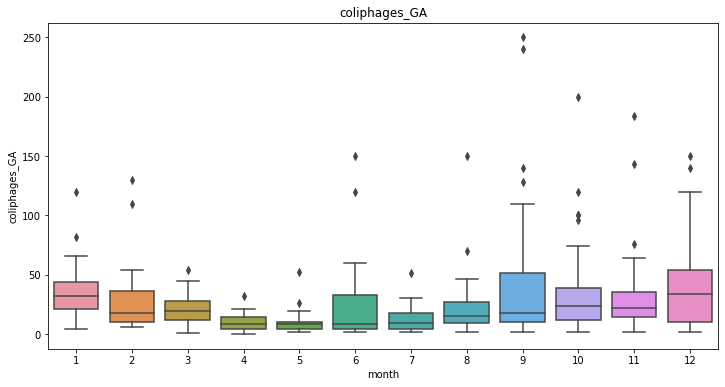




coliforms_LAE
2012-01-02 09:30:00
2019-12-30 09:23:00



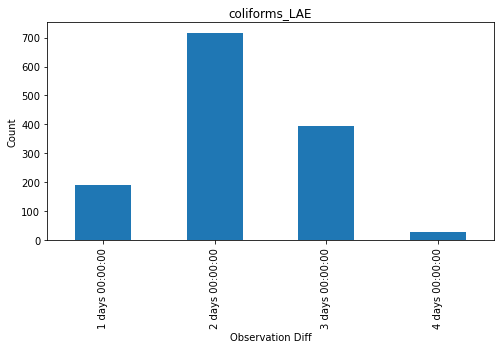

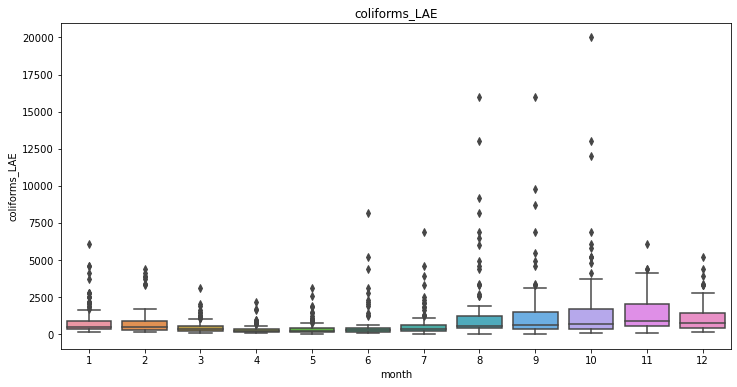




coliforms_GA
2012-01-02 10:44:00
2019-12-30 12:20:00



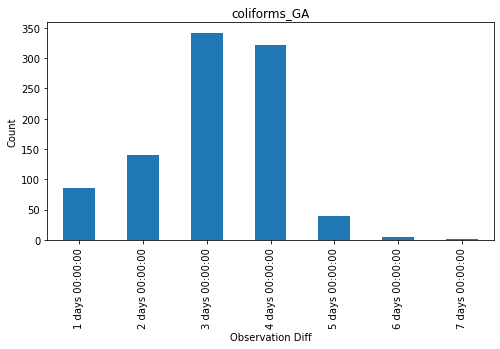

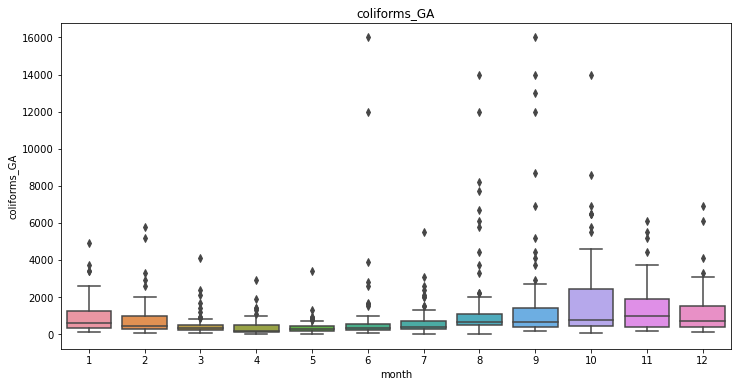




clostridia_LAE
2012-01-02 09:30:00
2019-12-30 09:23:00



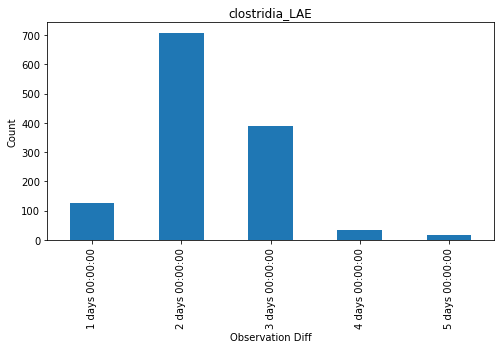

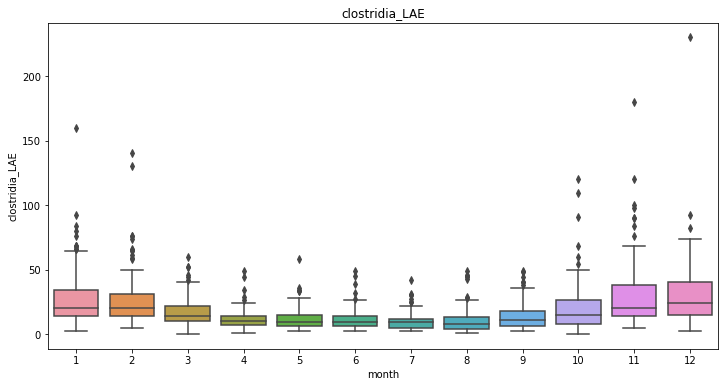




clostridia_GA
2012-01-02 10:44:00
2019-12-30 12:20:00



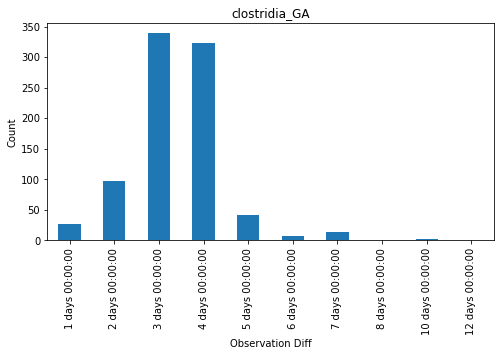

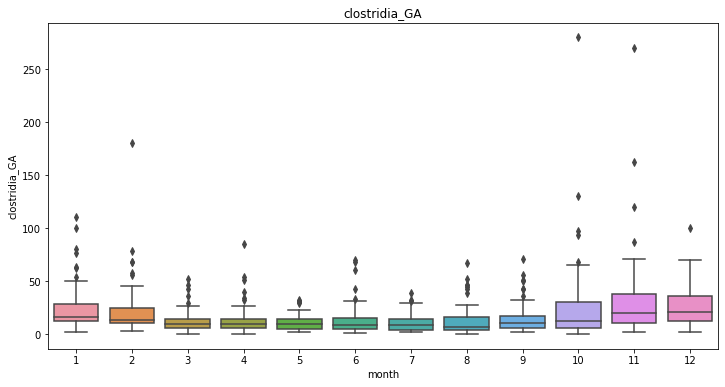

In [6]:
# Other fecal indicators

labels = [
    'coliphages_LAE',
    'coliphages_GA',
    'coliforms_LAE',
    'coliforms_GA',
    'clostridia_LAE',
    'clostridia_GA'
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    print(df.iloc[0, 0])
    print(df.iloc[-1, 0])
    print('')
    
    df['ds'] = df['timestamp'].dt.date
    
    df = df.groupby('ds').mean().reset_index()

    plt.figure(figsize=(8,4), facecolor='w')
    pd.DataFrame(df['ds'].diff()).groupby('ds').size().plot.bar()
    plt.ylabel('Count')
    plt.xlabel('Observation Diff')
    plt.title(label)
    plt.savefig(
        img_path + label + '_ObservationDiffs.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()

    df.index = pd.DatetimeIndex(df['ds'])
    df['month'] = df.index.month
    
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='month', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_MonthlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    print('\n\n')

precipitation_VB
2002-01-01 06:00:00
2019-12-01 06:00:00



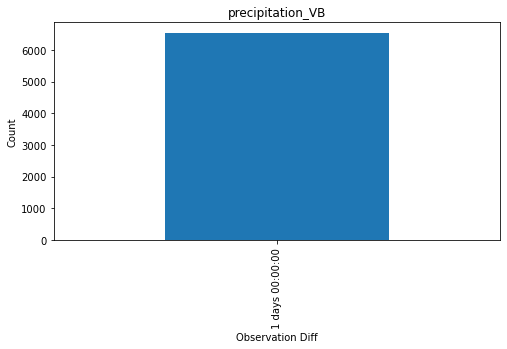

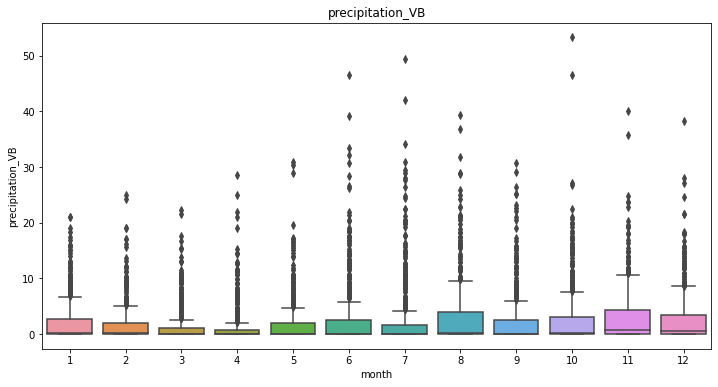




precipitation_KR
2002-01-01 06:00:00
2019-12-01 06:00:00



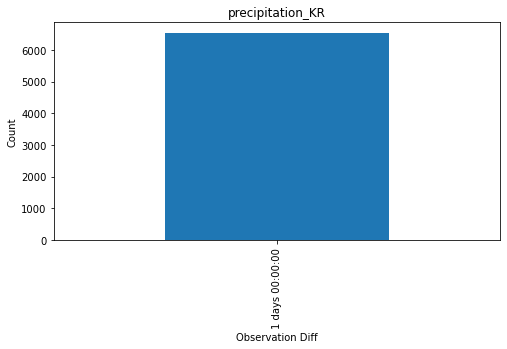

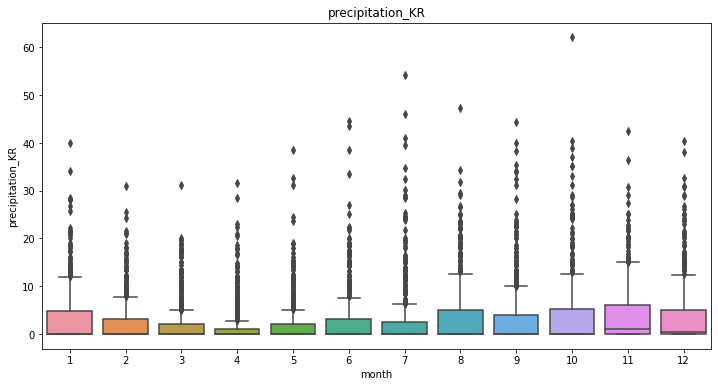




precipitation_GBG
2002-01-01 01:00:00
2019-11-01 06:00:00



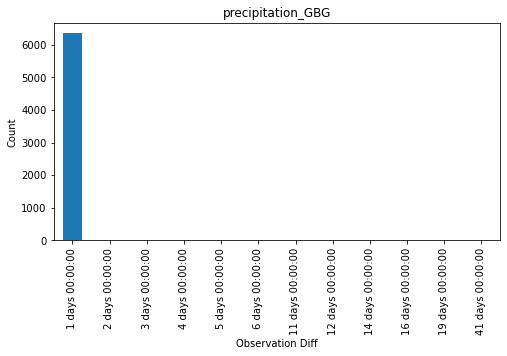

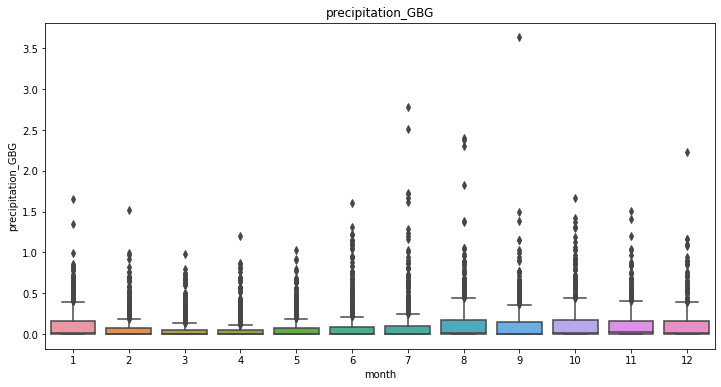

In [7]:
# Precipitation

labels = [
    'precipitation_VB',
    'precipitation_KR',
    'precipitation_GBG'
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    print(df.iloc[0, 0])
    print(df.iloc[-1, 0])
    print('')
    
    df['ds'] = df['timestamp'].dt.date
    
    df = df.groupby('ds').mean().reset_index()

    plt.figure(figsize=(8,4), facecolor='w')
    pd.DataFrame(df['ds'].diff()).groupby('ds').size().plot.bar()
    plt.ylabel('Count')
    plt.xlabel('Observation Diff')
    plt.title(label)
    plt.savefig(
        img_path + label + '_ObservationDiffs.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()

    df.index = pd.DatetimeIndex(df['ds'])
    df['month'] = df.index.month
    
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='month', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_MonthlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    print('\n\n')

flowrate_LE


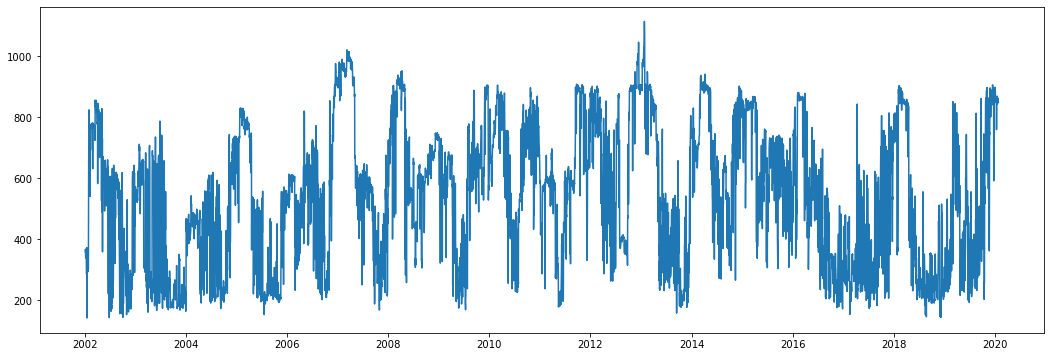

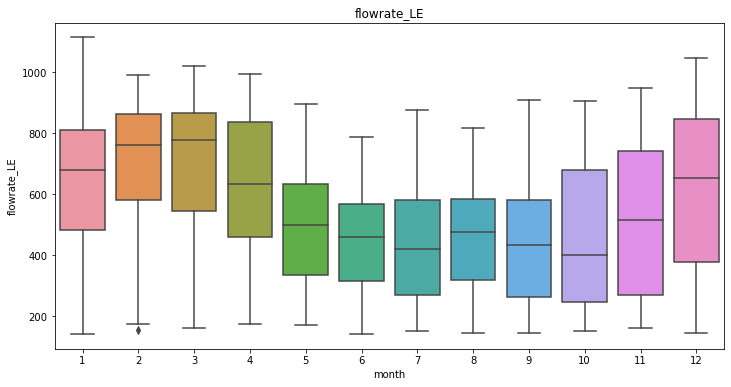

flowrate_GG


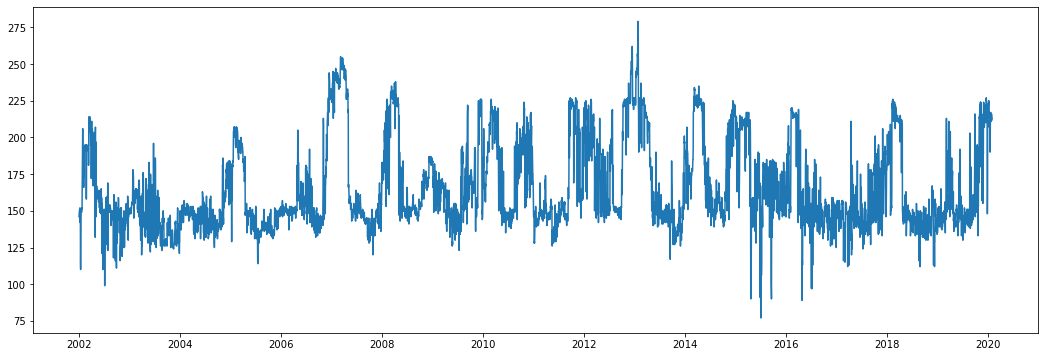

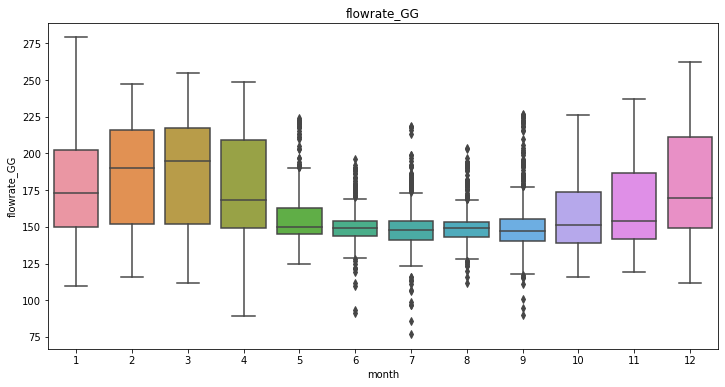

In [8]:
labels = [
    'flowrate_LE',
    'flowrate_GG',
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    df.index = pd.DatetimeIndex(df['timestamp'].dt.date)
    df = df.drop(labels='timestamp', axis=1)
    df['month'] = df.index.month
    
    plt.figure(figsize=(18, 6), facecolor='w')
    plt.plot(df.index, df[label])
    plt.show()
    
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='month', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_MonthlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    

timestamp
2016-01-15    -0.10
2016-01-08     0.05
2012-12-14     0.08
2019-02-06     0.10
2018-03-07     0.10
              ...  
2014-08-04    22.10
2018-07-19    22.60
2014-07-28    23.00
2014-08-01    23.10
2014-07-30    23.70
Name: waterTemp_LAE, Length: 1306, dtype: float64


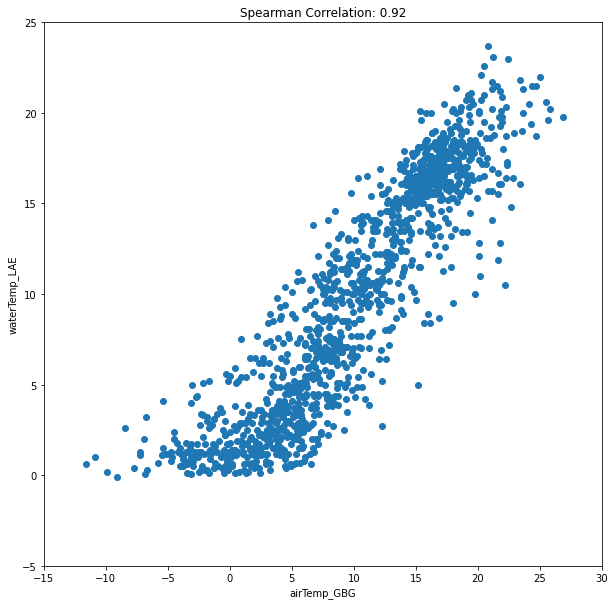

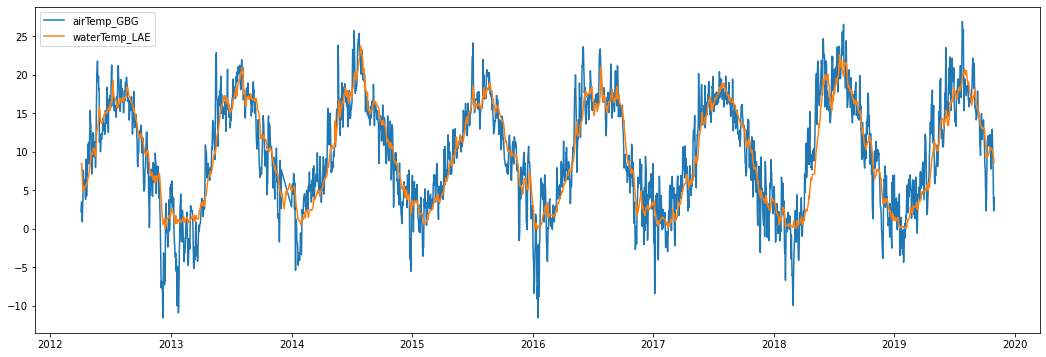

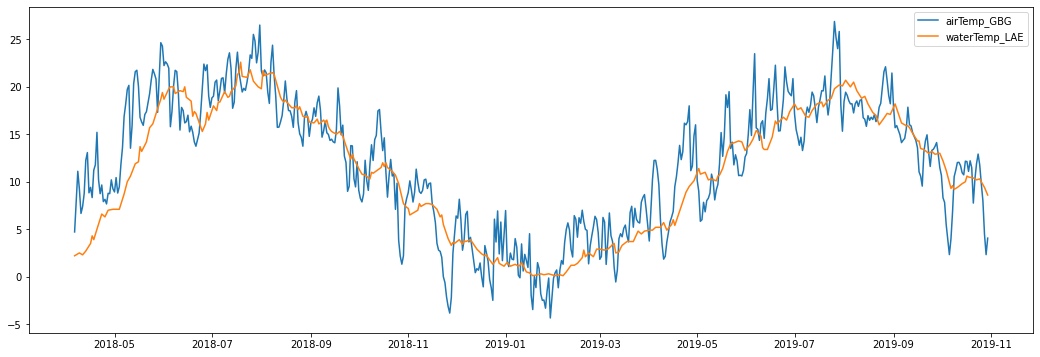

In [7]:
labels = [
    'waterTemp_LAE',
    'airTemp_GBG',
]

train_start = '2012-04-03'
train_end = '2018-04-05'
test_start = '2018-04-06'
test_end = '2019-10-30'
    
water_label = 'waterTemp_LAE'
df_water = pd.read_csv(
    data_folder + water_label + '.csv',
    parse_dates=['timestamp']
)

df_water.index = pd.DatetimeIndex(df_water['timestamp'].dt.date)
df_water = df_water[~df_water.index.duplicated(keep='last')]
df_water = df_water.drop(labels='timestamp', axis=1)
df_water['month'] = df_water.index.month
df_water = df_water.loc[(df_water.index >= train_start) & (df_water.index <= test_end)]

air_label = 'airTemp_GBG'
df_air = pd.read_csv(
    data_folder + air_label + '.csv',
    parse_dates=['timestamp']
)

df_air['ds'] = df_air['timestamp'].dt.date
df_air = df_air.groupby('ds').mean().reset_index()
df_air.index = pd.DatetimeIndex(df_air['ds'])
df_air['month'] = df_air.index.month
df_air = df_air.drop(labels='ds', axis=1)
df_air = df_air.loc[(df_air.index >= train_start) & (df_air.index <= test_end)]


d = list(set(df_water.index.tolist()) & set(df_air.index.tolist()))
print(df_water.loc[d, water_label].sort_values())

plt.figure(figsize=(10, 10), facecolor='w')
plt.scatter(df_air.loc[d, air_label], df_water.loc[d, water_label])
plt.xlim(-15, 30)
plt.ylim(-5, 25)
plt.xlabel(air_label)
plt.ylabel(water_label)
plt.title('Spearman Correlation: ' + '{:.2f}'.format(stats.spearmanr(df_air.loc[d, air_label], df_water.loc[d, water_label])[0]))
#plt.savefig('temp_corr.png', bbox_inches='tight', transparent=False)
plt.show()

plt.figure(figsize=(18, 6), facecolor='w')
plt.plot(df_air.index, df_air[air_label], label=air_label)
plt.plot(df_water.index, df_water[water_label], label=water_label)
plt.legend()
#plt.savefig('temp.png', bbox_inches='tight', transparent=False)
plt.show()

df_water = df_water.loc[(df_water.index >= test_start) & (df_water.index <= test_end)]
df_air = df_air.loc[(df_air.index >= test_start) & (df_air.index <= test_end)]

plt.figure(figsize=(18, 6), facecolor='w')
plt.plot(df_air.index, df_air[air_label], label=air_label)
plt.plot(df_water.index, df_water[water_label], label=water_label)
plt.legend()
#plt.savefig('temp_zoom.png', bbox_inches='tight', transparent=False)
plt.show()


turb_LAE
49.0
1.9


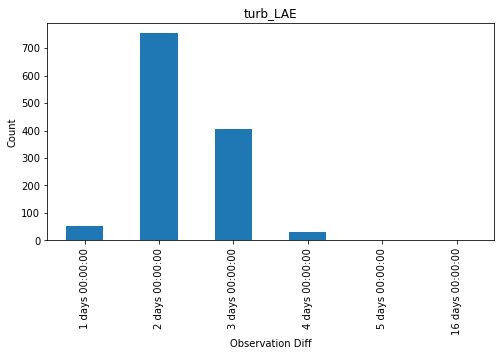

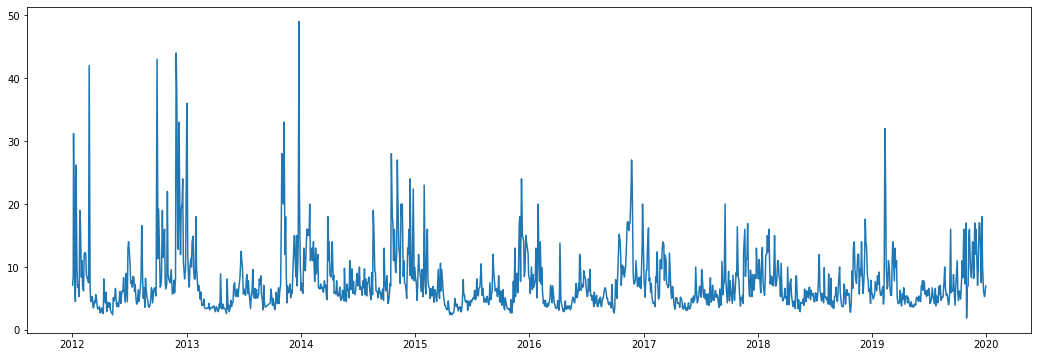

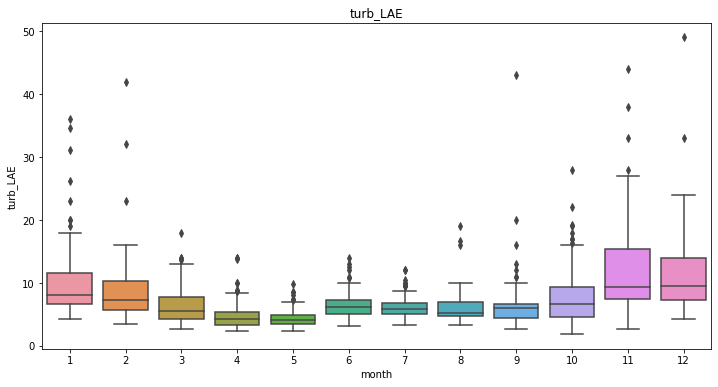




turb_GA
25.0
1.8


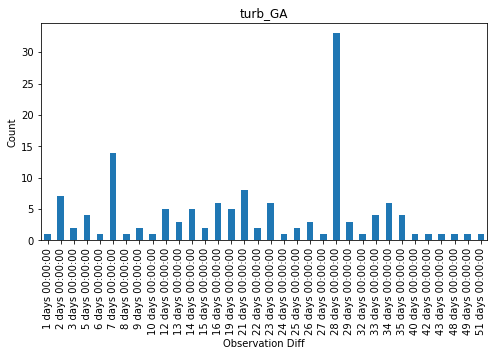

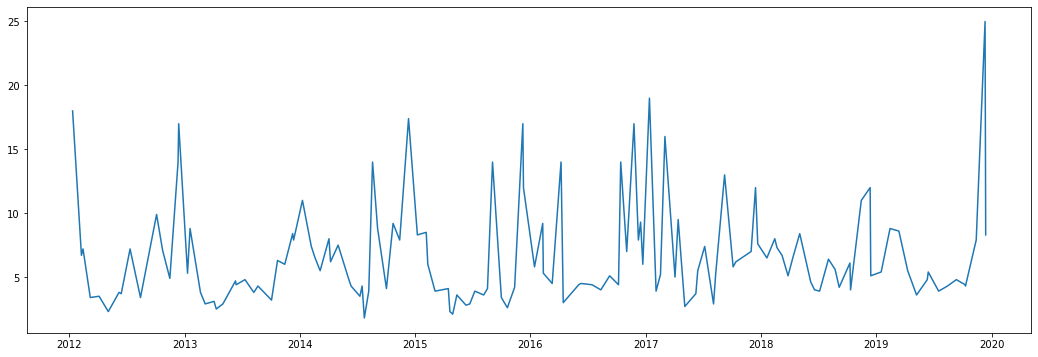

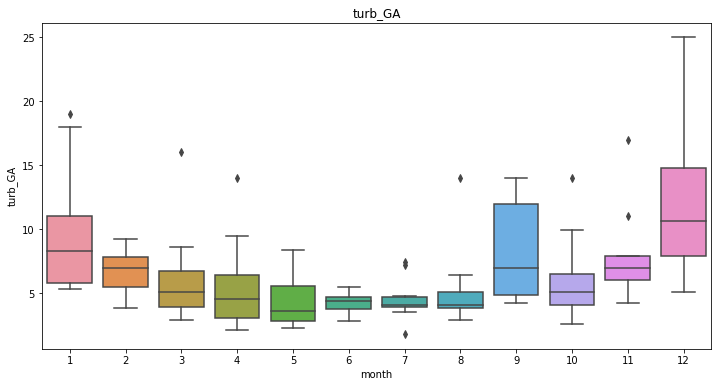

In [12]:
# Turbidity

labels = [
    'turb_LAE',
    'turb_GA'
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    df['ds'] = df['timestamp'].dt.date
    
    df = df.groupby('ds').mean().reset_index()

    plt.figure(figsize=(8,4), facecolor='w')
    pd.DataFrame(df['ds'].diff()).groupby('ds').size().plot.bar()
    plt.ylabel('Count')
    plt.xlabel('Observation Diff')
    plt.title(label)
    plt.savefig(
        img_path + label + '_ObservationDiffs.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()

    df.index = pd.DatetimeIndex(df['ds'])
    df['month'] = df.index.month
    
    plt.figure(figsize=(18, 6), facecolor='w')
    plt.plot(df.index, df[label])
    plt.show()
    
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='month', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_MonthlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    print('\n\n')

coliforms_LAE


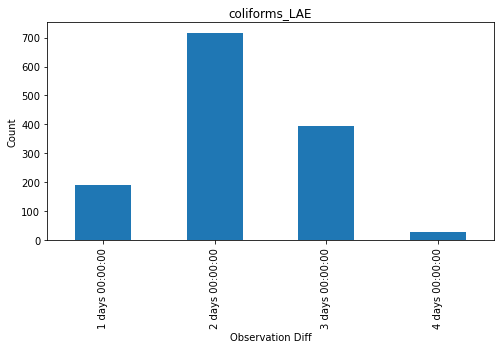

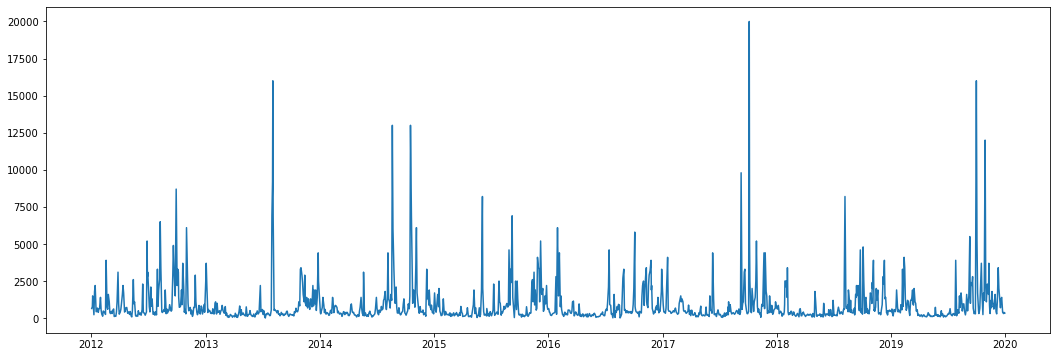

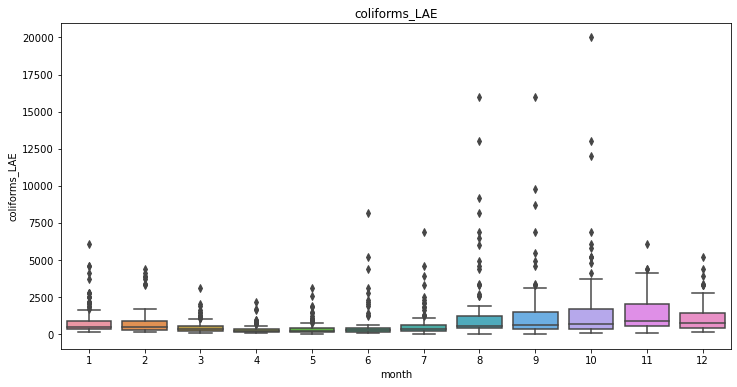




coliforms_GA


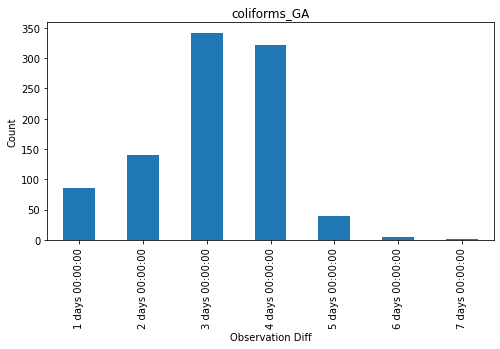

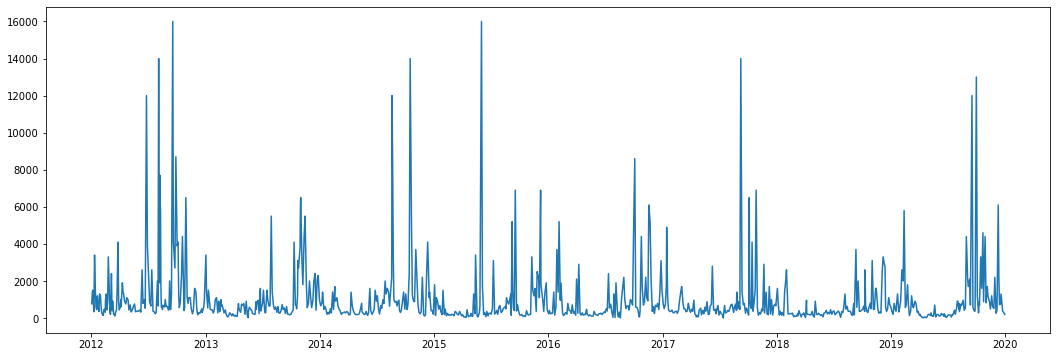

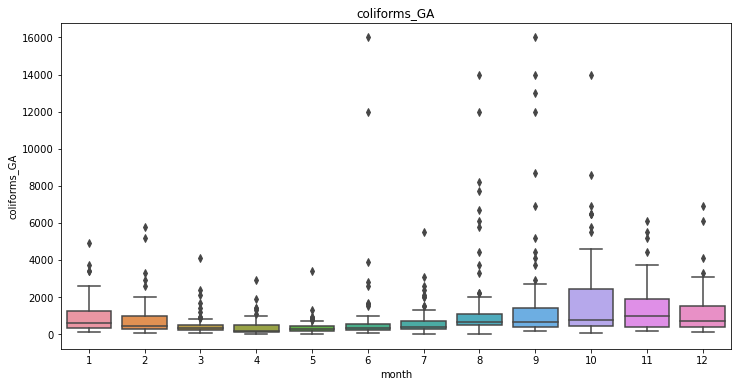

In [11]:
# Coliforms

labels = [
    'coliforms_LAE',
    'coliforms_GA'
]

for label in labels:
    
    print(label)
    
    df = pd.read_csv(
        data_folder + label + '.csv',
        parse_dates=['timestamp']
    )
    
    df['ds'] = df['timestamp'].dt.date
    
    df = df.groupby('ds').mean().reset_index()

    plt.figure(figsize=(8,4), facecolor='w')
    pd.DataFrame(df['ds'].diff()).groupby('ds').size().plot.bar()
    plt.ylabel('Count')
    plt.xlabel('Observation Diff')
    plt.title(label)
    plt.savefig(
        img_path + label + '_ObservationDiffs.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()

    df.index = pd.DatetimeIndex(df['ds'])
    df['month'] = df.index.month
    
    plt.figure(figsize=(18, 6), facecolor='w')
    plt.plot(df.index, df[label])
    plt.show()
    
    plt.figure(figsize=(12, 6), facecolor='w')
    sns.boxplot(data=df, x='month', y=label)
    plt.title(label)
    plt.savefig(
        img_path + label + '_MonthlyAgg.png',
        bbox_inches='tight',
        transparent=False
    )
    plt.show()
    
    print('\n\n')